In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium
import missingno as msno
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [255]:
raw_data=pd.read_csv("data/exam_data.csv")

In [174]:
raw_data

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,1,2016-02-07 16:20:30,2016-02-07 16:25:32,1,0.70,-73.982292,40.768974,1,N,...,5.0,0.0,0.5,1.15,0.00,0.3,6.95,False,False,False
1,2,1,2016-02-19 20:51:07,2016-02-19 21:28:32,1,8.80,-73.864166,40.770058,1,N,...,33.5,0.5,0.5,7.00,5.54,0.3,47.34,True,True,False
2,3,2,2016-02-19 20:52:36,2016-02-19 21:28:59,6,19.26,-73.781998,40.644669,1,N,...,53.5,0.5,0.5,0.00,0.00,0.3,54.80,False,True,True
3,4,1,2016-02-19 20:54:24,2016-02-19 21:04:21,1,0.70,-73.982056,40.740215,1,N,...,7.5,0.5,0.5,0.00,0.00,0.3,8.80,False,True,True
4,5,2,2016-02-19 20:55:47,2016-02-19 21:01:12,2,0.46,-73.990967,40.734089,1,N,...,5.0,0.5,0.5,1.00,0.00,0.3,7.30,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28449,28450,2,2016-02-28 23:37:15,2016-02-28 23:45:26,1,1.61,-73.988579,40.748680,1,N,...,8.0,0.5,0.5,1.86,0.00,0.3,11.16,True,True,False
28450,28451,2,2016-02-28 23:40:56,2016-02-28 23:49:56,1,2.22,-73.981430,40.769901,1,N,...,9.5,0.5,0.5,2.16,0.00,0.3,12.96,True,True,False
28451,28452,2,2016-02-28 23:42:44,2016-02-29 00:10:35,1,18.34,-73.778664,40.646683,2,N,...,52.0,0.0,0.5,11.67,5.54,0.3,70.01,True,False,False
28452,28453,2,2016-02-28 23:49:27,2016-02-29 00:02:15,2,2.94,-73.981049,40.764149,1,N,...,12.5,0.5,0.5,3.45,0.00,0.3,17.25,True,True,False


In [175]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28454 entries, 0 to 28453
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             28454 non-null  int64  
 1   VendorID               28454 non-null  int64  
 2   tpep_pickup_datetime   28454 non-null  object 
 3   tpep_dropoff_datetime  28454 non-null  object 
 4   passenger_count        28454 non-null  int64  
 5   trip_distance          28454 non-null  float64
 6   pickup_longitude       28454 non-null  float64
 7   pickup_latitude        28454 non-null  float64
 8   RatecodeID             28454 non-null  int64  
 9   store_and_fwd_flag     28454 non-null  object 
 10  dropoff_longitude      28454 non-null  float64
 11  dropoff_latitude       28454 non-null  float64
 12  payment_type           28454 non-null  int64  
 13  fare_amount            28454 non-null  float64
 14  extra                  28454 non-null  float64
 15  mt

In [256]:
df = raw_data.drop(raw_data.columns[[0]], axis=1) 

In [257]:
df.isnull().sum()
df.duplicated().sum()

0

<AxesSubplot:>

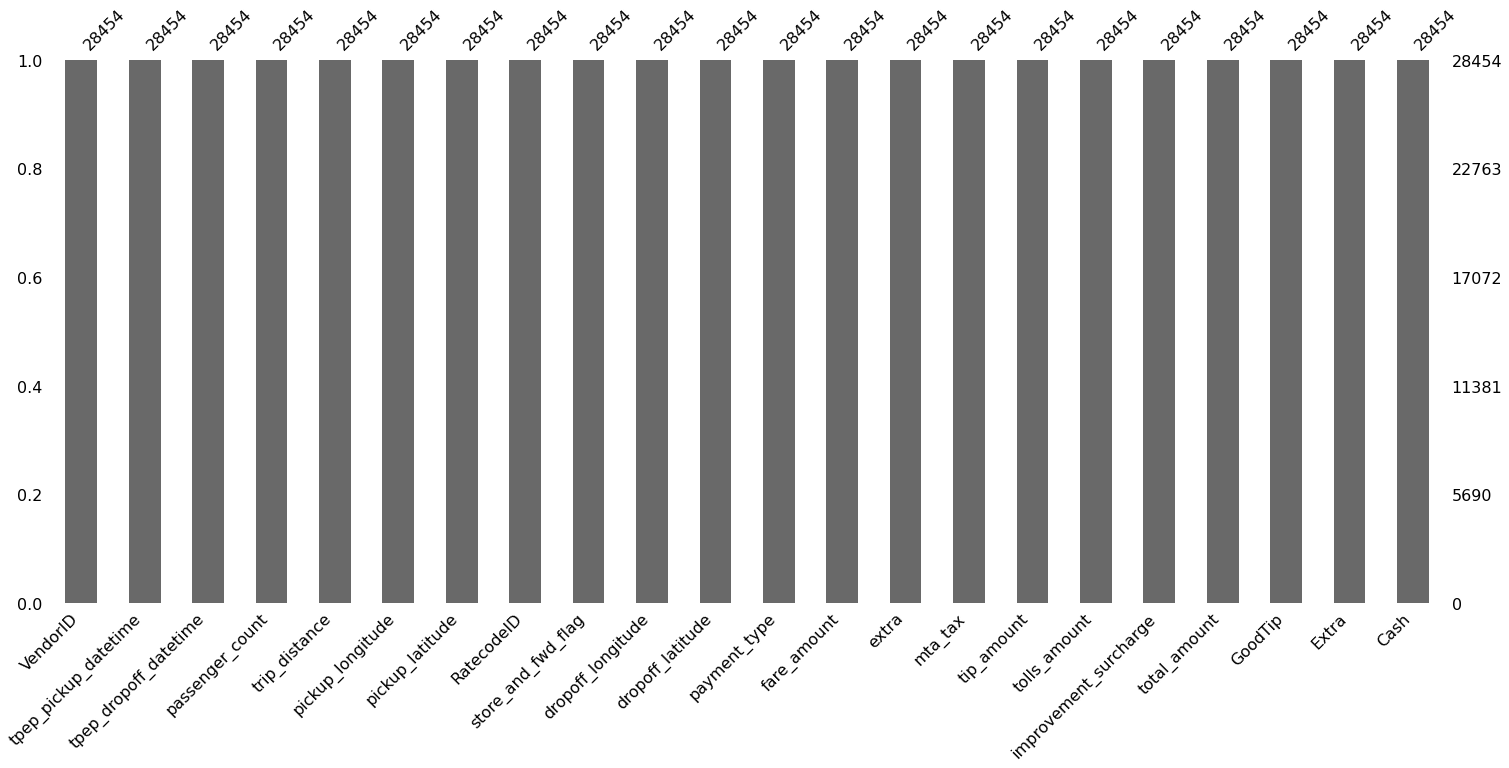

In [178]:
msno.bar(df)


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28454 entries, 0 to 28453
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               28454 non-null  int64  
 1   tpep_pickup_datetime   28454 non-null  object 
 2   tpep_dropoff_datetime  28454 non-null  object 
 3   passenger_count        28454 non-null  int64  
 4   trip_distance          28454 non-null  float64
 5   pickup_longitude       28454 non-null  float64
 6   pickup_latitude        28454 non-null  float64
 7   RatecodeID             28454 non-null  int64  
 8   store_and_fwd_flag     28454 non-null  object 
 9   dropoff_longitude      28454 non-null  float64
 10  dropoff_latitude       28454 non-null  float64
 11  payment_type           28454 non-null  int64  
 12  fare_amount            28454 non-null  float64
 13  extra                  28454 non-null  float64
 14  mta_tax                28454 non-null  float64
 15  ti

In [258]:
df['GoodTip']=df['GoodTip'].replace(True,1)
df['GoodTip']=df['GoodTip'].replace(False,0)
df['Extra']=df['Extra'].replace(True,1)
df['Extra']=df['Extra'].replace(False,0)
df['Cash']=df['Cash'].replace(True,1)
df['Cash']=df['Cash'].replace(False,0)

In [259]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [260]:
diff=df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['trip_duration'] = diff/np.timedelta64(1,'m')

In [261]:
df['pickup_day']=df['tpep_pickup_datetime'].dt.day_name()
df['dropoff_day']=df['tpep_dropoff_datetime'].dt.day_name()

df['pickup_day_no']=df['tpep_pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['tpep_dropoff_datetime'].dt.weekday

df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour']=df['tpep_dropoff_datetime'].dt.hour

df['pickup_min']=df['tpep_pickup_datetime'].dt.minute
df['dropoff_min']=df['tpep_dropoff_datetime'].dt.minute

df['pickup_min']=df['tpep_pickup_datetime'].dt.second
df['dropoff_min']=df['tpep_dropoff_datetime'].dt.second

#df['pickup_month']=df['tpep_pickup_datetime'].dt.month
#df['dropoff_month']=df['tpep_dropoff_datetime'].dt.month

In [262]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [263]:
df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day)
df['dropoff_timeofday']=df['dropoff_hour'].apply(time_of_day)

In [187]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,...,GoodTip,Extra,Cash,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_min,dropoff_min
count,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,...,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000
mean,1.527061,1.641492,2.830239,-72.829545,40.119641,1.035285,-72.865533,40.140239,1.331201,12.346235,...,0.384761,0.479159,0.320412,14.883381,2.993709,2.999403,13.695860,13.689429,29.514690,29.410803
std,0.499276,1.293418,3.616985,9.142567,5.034007,0.278481,8.998636,4.954860,0.486227,11.721551,...,0.486547,0.499574,0.466643,50.701791,1.997907,1.999253,6.326039,6.411559,17.287718,17.273098
min,1.000000,1.000000,0.000000,-121.933220,0.000000,1.000000,-121.933342,0.000000,1.000000,-93.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,-73.991608,40.736386,1.000000,-73.991302,40.734540,1.000000,6.500000,...,0.000000,0.000000,0.000000,6.400000,1.000000,1.000000,9.000000,9.000000,15.000000,14.000000
50%,2.000000,1.000000,1.660000,-73.981567,40.753605,1.000000,-73.979576,40.753632,1.000000,9.000000,...,0.000000,0.000000,0.000000,10.533333,3.000000,3.000000,14.000000,14.000000,29.000000,29.000000
75%,2.000000,2.000000,3.070000,-73.966593,40.767979,1.000000,-73.962364,40.769409,2.000000,14.000000,...,1.000000,1.000000,1.000000,17.000000,5.000000,5.000000,19.000000,19.000000,45.000000,44.000000
max,2.000000,6.000000,182.200000,0.000000,40.934280,5.000000,0.000000,41.034912,4.000000,780.000000,...,1.000000,1.000000,1.000000,1438.466667,6.000000,6.000000,23.000000,23.000000,59.000000,59.000000


In [188]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_min,dropoff_min,pickup_timeofday,dropoff_timeofday
0,1,2016-02-07 16:20:30,2016-02-07 16:25:32,1,0.70,-73.982292,40.768974,1,N,-73.973701,...,Sunday,Sunday,6,6,16,16,30,32,Evening,Evening
1,1,2016-02-19 20:51:07,2016-02-19 21:28:32,1,8.80,-73.864166,40.770058,1,N,-73.952034,...,Friday,Friday,4,4,20,21,7,32,Evening,Evening
2,2,2016-02-19 20:52:36,2016-02-19 21:28:59,6,19.26,-73.781998,40.644669,1,N,-73.977654,...,Friday,Friday,4,4,20,21,36,59,Evening,Evening
3,1,2016-02-19 20:54:24,2016-02-19 21:04:21,1,0.70,-73.982056,40.740215,1,N,-73.987534,...,Friday,Friday,4,4,20,21,24,21,Evening,Evening
4,2,2016-02-19 20:55:47,2016-02-19 21:01:12,2,0.46,-73.990967,40.734089,1,N,-73.986542,...,Friday,Friday,4,4,20,21,47,12,Evening,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28449,2,2016-02-28 23:37:15,2016-02-28 23:45:26,1,1.61,-73.988579,40.748680,1,N,-73.984474,...,Sunday,Sunday,6,6,23,23,15,26,Late night,Late night
28450,2,2016-02-28 23:40:56,2016-02-28 23:49:56,1,2.22,-73.981430,40.769901,1,N,-73.995399,...,Sunday,Sunday,6,6,23,23,56,56,Late night,Late night
28451,2,2016-02-28 23:42:44,2016-02-29 00:10:35,1,18.34,-73.778664,40.646683,2,N,-73.993172,...,Sunday,Monday,6,0,23,0,44,35,Late night,Late night
28452,2,2016-02-28 23:49:27,2016-02-29 00:02:15,2,2.94,-73.981049,40.764149,1,N,-73.954407,...,Sunday,Monday,6,0,23,0,27,15,Late night,Late night


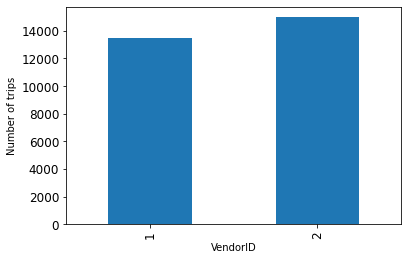

In [264]:
plot= df.groupby(['VendorID']).size().plot(kind='bar')

plot.set_xlabel('VendorID', fontsize=10)
plot.set_ylabel('Number of trips', fontsize=10)
plot.tick_params(labelsize=12)

Text(0.5, 1.0, 'Distribution of Tip amount')

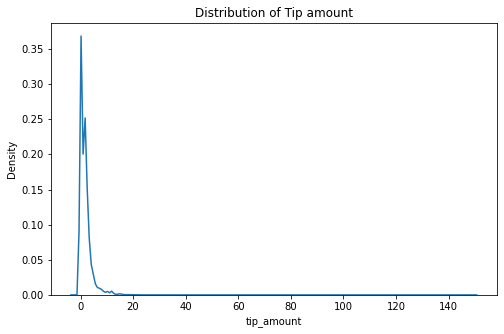

In [265]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['tip_amount']).set_title("Distribution of Tip amount")

<AxesSubplot:ylabel='tip_amount'>

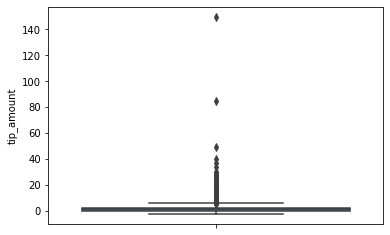

In [191]:
sns.boxplot(y="tip_amount", data = df)

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


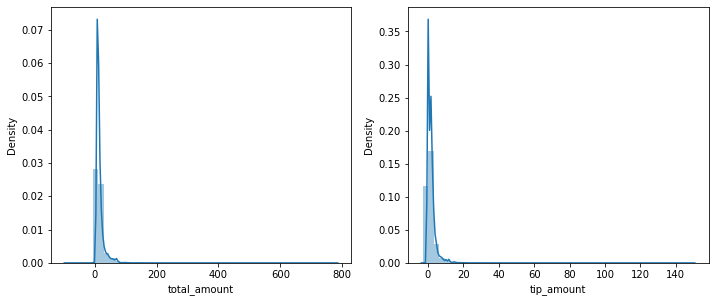

In [266]:
plt.subplots(figsize=(15,8))
for i, col in enumerate(['total_amount', 'tip_amount']):
 plt.subplot(2,3, i + 1)
 seaborn.distplot(df[col])
plt.tight_layout()
plt.show()

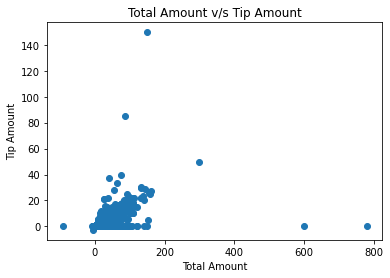

In [267]:
plt.scatter(df['total_amount'], df['tip_amount'])
plt.title('Total Amount v/s Tip Amount')
plt.xlabel('Total Amount')
plt.ylabel('Tip Amount')
plt.show()

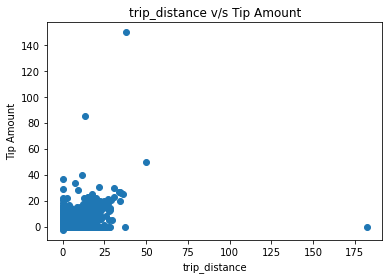

In [306]:
plt.scatter(df['trip_distance'], df['tip_amount'])
plt.title('trip_distance v/s Tip Amount')
plt.xlabel('trip_distance')
plt.ylabel('Tip Amount')
plt.show()

<AxesSubplot:xlabel='payment_type', ylabel='count'>

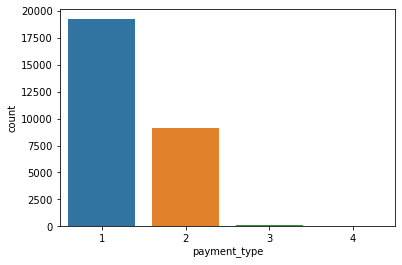

In [192]:
sns.countplot(x='payment_type',data=df)

In [193]:
df['trip_distance'].describe()

count    28454.000000
mean         2.830239
std          3.616985
min          0.000000
25%          1.000000
50%          1.660000
75%          3.070000
max        182.200000
Name: trip_distance, dtype: float64

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_distance', ylabel='Density'>

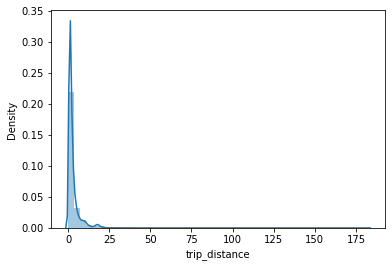

In [194]:
seaborn.distplot(df['trip_distance'])

c:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_distance', ylabel='Density'>

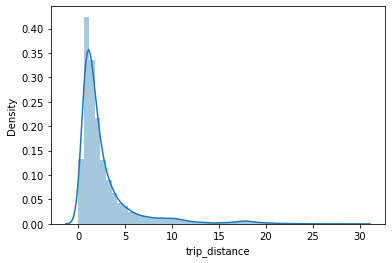

In [195]:
seaborn.distplot(df['trip_distance'][df['trip_distance'] <=30.0])

Text(0, 0.5, 'numbers')

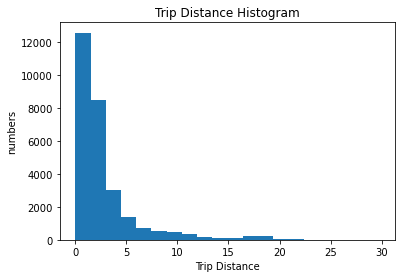

In [196]:
plt.figure(5)
plt.hist(df['trip_distance'][df['trip_distance'] <=30.0],bins=20)
plt.title("Trip Distance Histogram")
plt.xlabel("Trip Distance")
plt.ylabel("numbers")

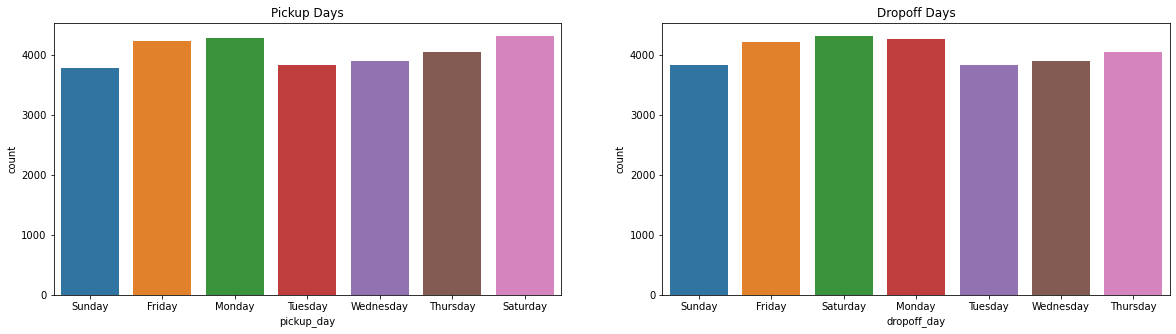

In [197]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))

ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=df,ax=ax1)

ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=df,ax=ax2)

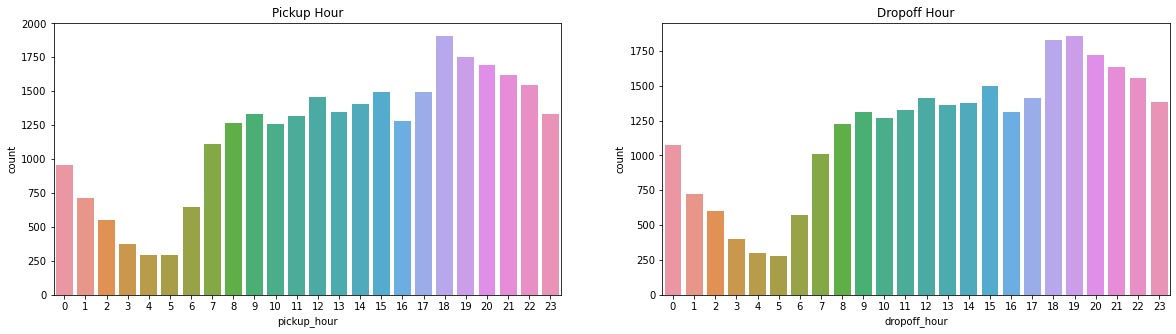

In [198]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))

ax3.set_title('Pickup Hour')
ax=sns.countplot(x="pickup_hour",data=df,ax=ax3)

ax4.set_title('Dropoff Hour')
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax4)

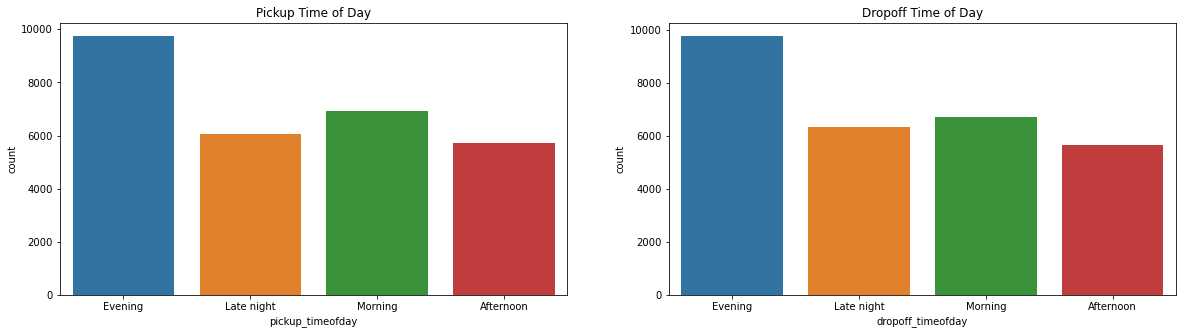

In [199]:
figure,(ax5,ax6)=plt.subplots(ncols=2,figsize=(20,5))

ax5.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=df,ax=ax5)

ax6.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=df,ax=ax6)

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

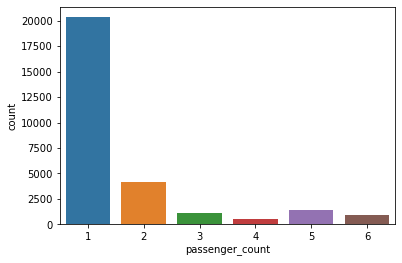

In [200]:
sns.countplot(x='passenger_count',data=df)

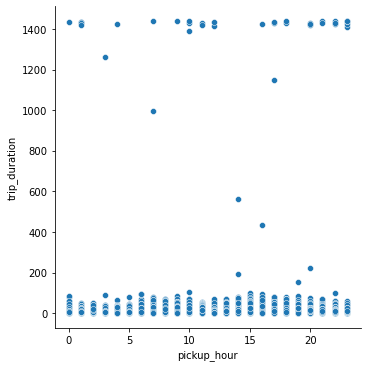

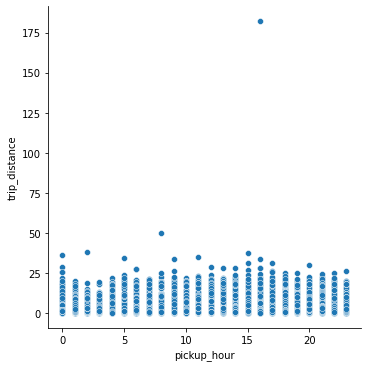

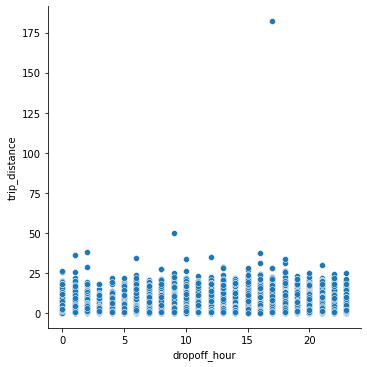

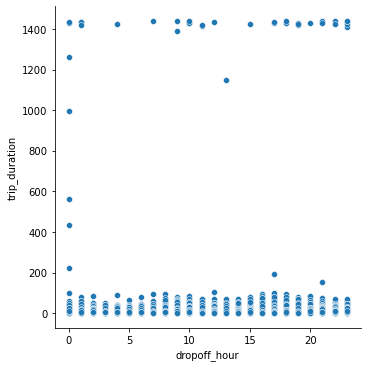

In [201]:

a1 = sns.relplot(y=df.trip_duration,x='pickup_hour',data=df)
a1
a2 = sns.relplot(y=df.trip_distance,x='pickup_hour',data=df)
a2
a3 = sns.relplot(y=df.trip_distance,x='dropoff_hour',data=df)
a3
a4 = sns.relplot(y=df.trip_duration,x='dropoff_hour',data=df)
a4

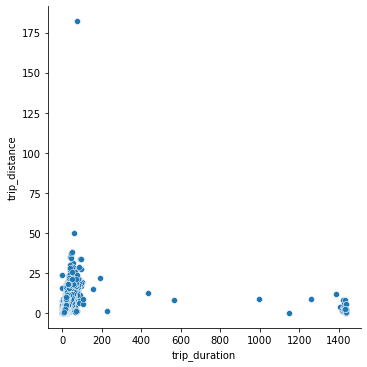

In [202]:
sns.relplot(y=df.trip_distance,x='trip_duration',data=df)

### Checka and remove outliers

##### Plotting pickup cordinates which are outside the bounding box of New-York

In [203]:
outlier_locations = df[((df.pickup_longitude <= -74.15) | (df.pickup_latitude <= 40.5774)| \
    (df.pickup_longitude >= -73.7004) | (df.pickup_latitude >= 40.9176))]
len(outlier_locations)

448

In [204]:
map_osm = folium.Map(location=[40.734695, -73.990372] )
sample_locations = outlier_locations
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(map_osm)
#map_osm

In [205]:
outlier_locations = df[((df.dropoff_longitude <= -74.15) | (df.dropoff_latitude <= 40.5774)| \
    (df.dropoff_longitude >= -73.7004) | (df.dropoff_latitude >= 40.9176))]

len(outlier_locations)

514

In [207]:
map_osm = folium.Map(location=[40.734695, -73.990372] )
sample_locations = outlier_locations
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['dropoff_latitude'],j['dropoff_longitude']))).add_to(map_osm)
#map_osm

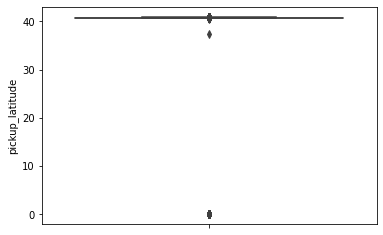

In [208]:
p1 = sns.boxplot(y="pickup_latitude", data = df)

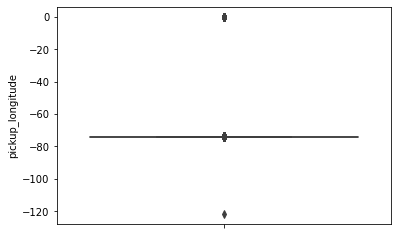

In [209]:
p2= sns.boxplot(y="pickup_longitude", data = df)

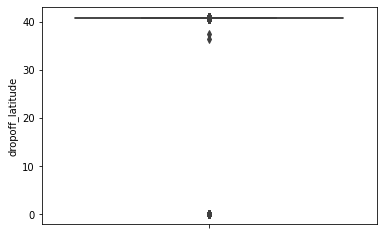

In [210]:
p3 = sns.boxplot(y="dropoff_latitude", data = df)

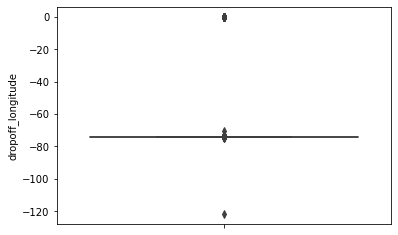

In [211]:
p4 = sns.boxplot(y="dropoff_longitude", data = df)

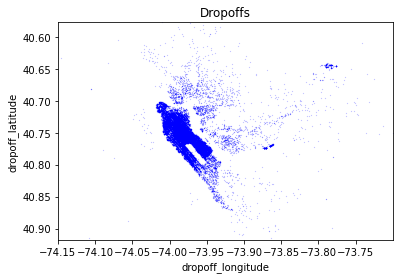

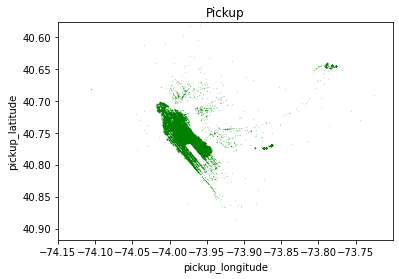

In [212]:
long_border1 = (-74.15, -73.7004)   
lat_border1 = (40.9176, 40.5774)         
df.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',color='blue', s=.02, alpha=.6)
plt1= plt.title("Dropoffs") 

plt1 = plt.ylim(lat_border1)
plt1 = plt.xlim(long_border1)

long_border2 = (-74.15,-73.7004)  
lat_border2 = (40.9176, 40.5774)    
df.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',color='green', s=.02, alpha=.6)
plt2 = plt.title("Pickup")

plt2 = plt.ylim(lat_border2)
plt2 = plt.xlim(long_border2)

## Remove outliers

In [213]:
df.drop(df[df['tip_amount'] <0].index, inplace = True)
df.drop(df[df['tip_amount'] >50].index, inplace = True)

In [214]:
df.drop(df[df['fare_amount'] <0 ].index, inplace = True)
df.drop(df[df['fare_amount'] >=200 ].index, inplace = True)

In [215]:
df.drop(df[df['trip_distance']<0].index, inplace = True)

In [216]:
df.drop(df[df['trip_duration']<=0].index, inplace = True)

# Remove outliers for Lat and Long

In [217]:
df = df[((df.dropoff_longitude >= -74.15) & (df.dropoff_longitude <= -73.7004) &\
(df.dropoff_latitude >= 40.5774) & (df.dropoff_latitude <= 40.9176)) & \
((df.pickup_longitude >= -74.15) & (df.pickup_latitude >= 40.5774)& \
(df.pickup_longitude <= -73.7004) & (df.pickup_latitude <= 40.9176))]

In [218]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,...,GoodTip,Extra,Cash,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_min,dropoff_min
count,27858.000000,27858.000000,27858.000000,27858.000000,27858.000000,27858.000000,27858.000000,27858.000000,27858.000000,27858.000000,...,27858.000000,27858.000000,27858.000000,27858.000000,27858.000000,27858.000000,27858.000000,27858.000000,27858.000000,27858.000000
mean,1.531194,1.644231,2.789041,-73.974499,40.751402,1.026922,-73.973787,40.752170,1.328595,12.124573,...,0.384522,0.480113,0.319477,14.788609,2.990882,2.996446,13.704824,13.697071,29.509189,29.418910
std,0.499035,1.297134,3.487534,0.035542,0.027095,0.230325,0.032046,0.031176,0.482677,9.505500,...,0.486491,0.499613,0.466283,50.026720,1.998740,1.999916,6.324140,6.410306,17.302227,17.265595
min,1.000000,1.000000,0.000000,-74.105347,40.580963,1.000000,-74.146179,40.578991,1.000000,0.010000,...,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,-73.991766,40.737535,1.000000,-73.991356,40.736054,1.000000,6.500000,...,0.000000,0.000000,0.000000,6.416667,1.000000,1.000000,9.000000,9.000000,15.000000,15.000000
50%,2.000000,1.000000,1.660000,-73.981850,40.754204,1.000000,-73.979881,40.754351,1.000000,9.000000,...,0.000000,0.000000,0.000000,10.516667,3.000000,3.000000,14.000000,15.000000,29.000000,29.000000
75%,2.000000,2.000000,3.040000,-73.967667,40.768292,1.000000,-73.963425,40.769779,2.000000,14.000000,...,1.000000,1.000000,1.000000,16.966667,5.000000,5.000000,19.000000,19.000000,45.000000,44.000000
max,2.000000,6.000000,182.200000,-73.744667,40.884586,5.000000,-73.712891,40.915081,4.000000,120.000000,...,1.000000,1.000000,1.000000,1438.466667,6.000000,6.000000,23.000000,23.000000,59.000000,59.000000


#### Correlation Matrix

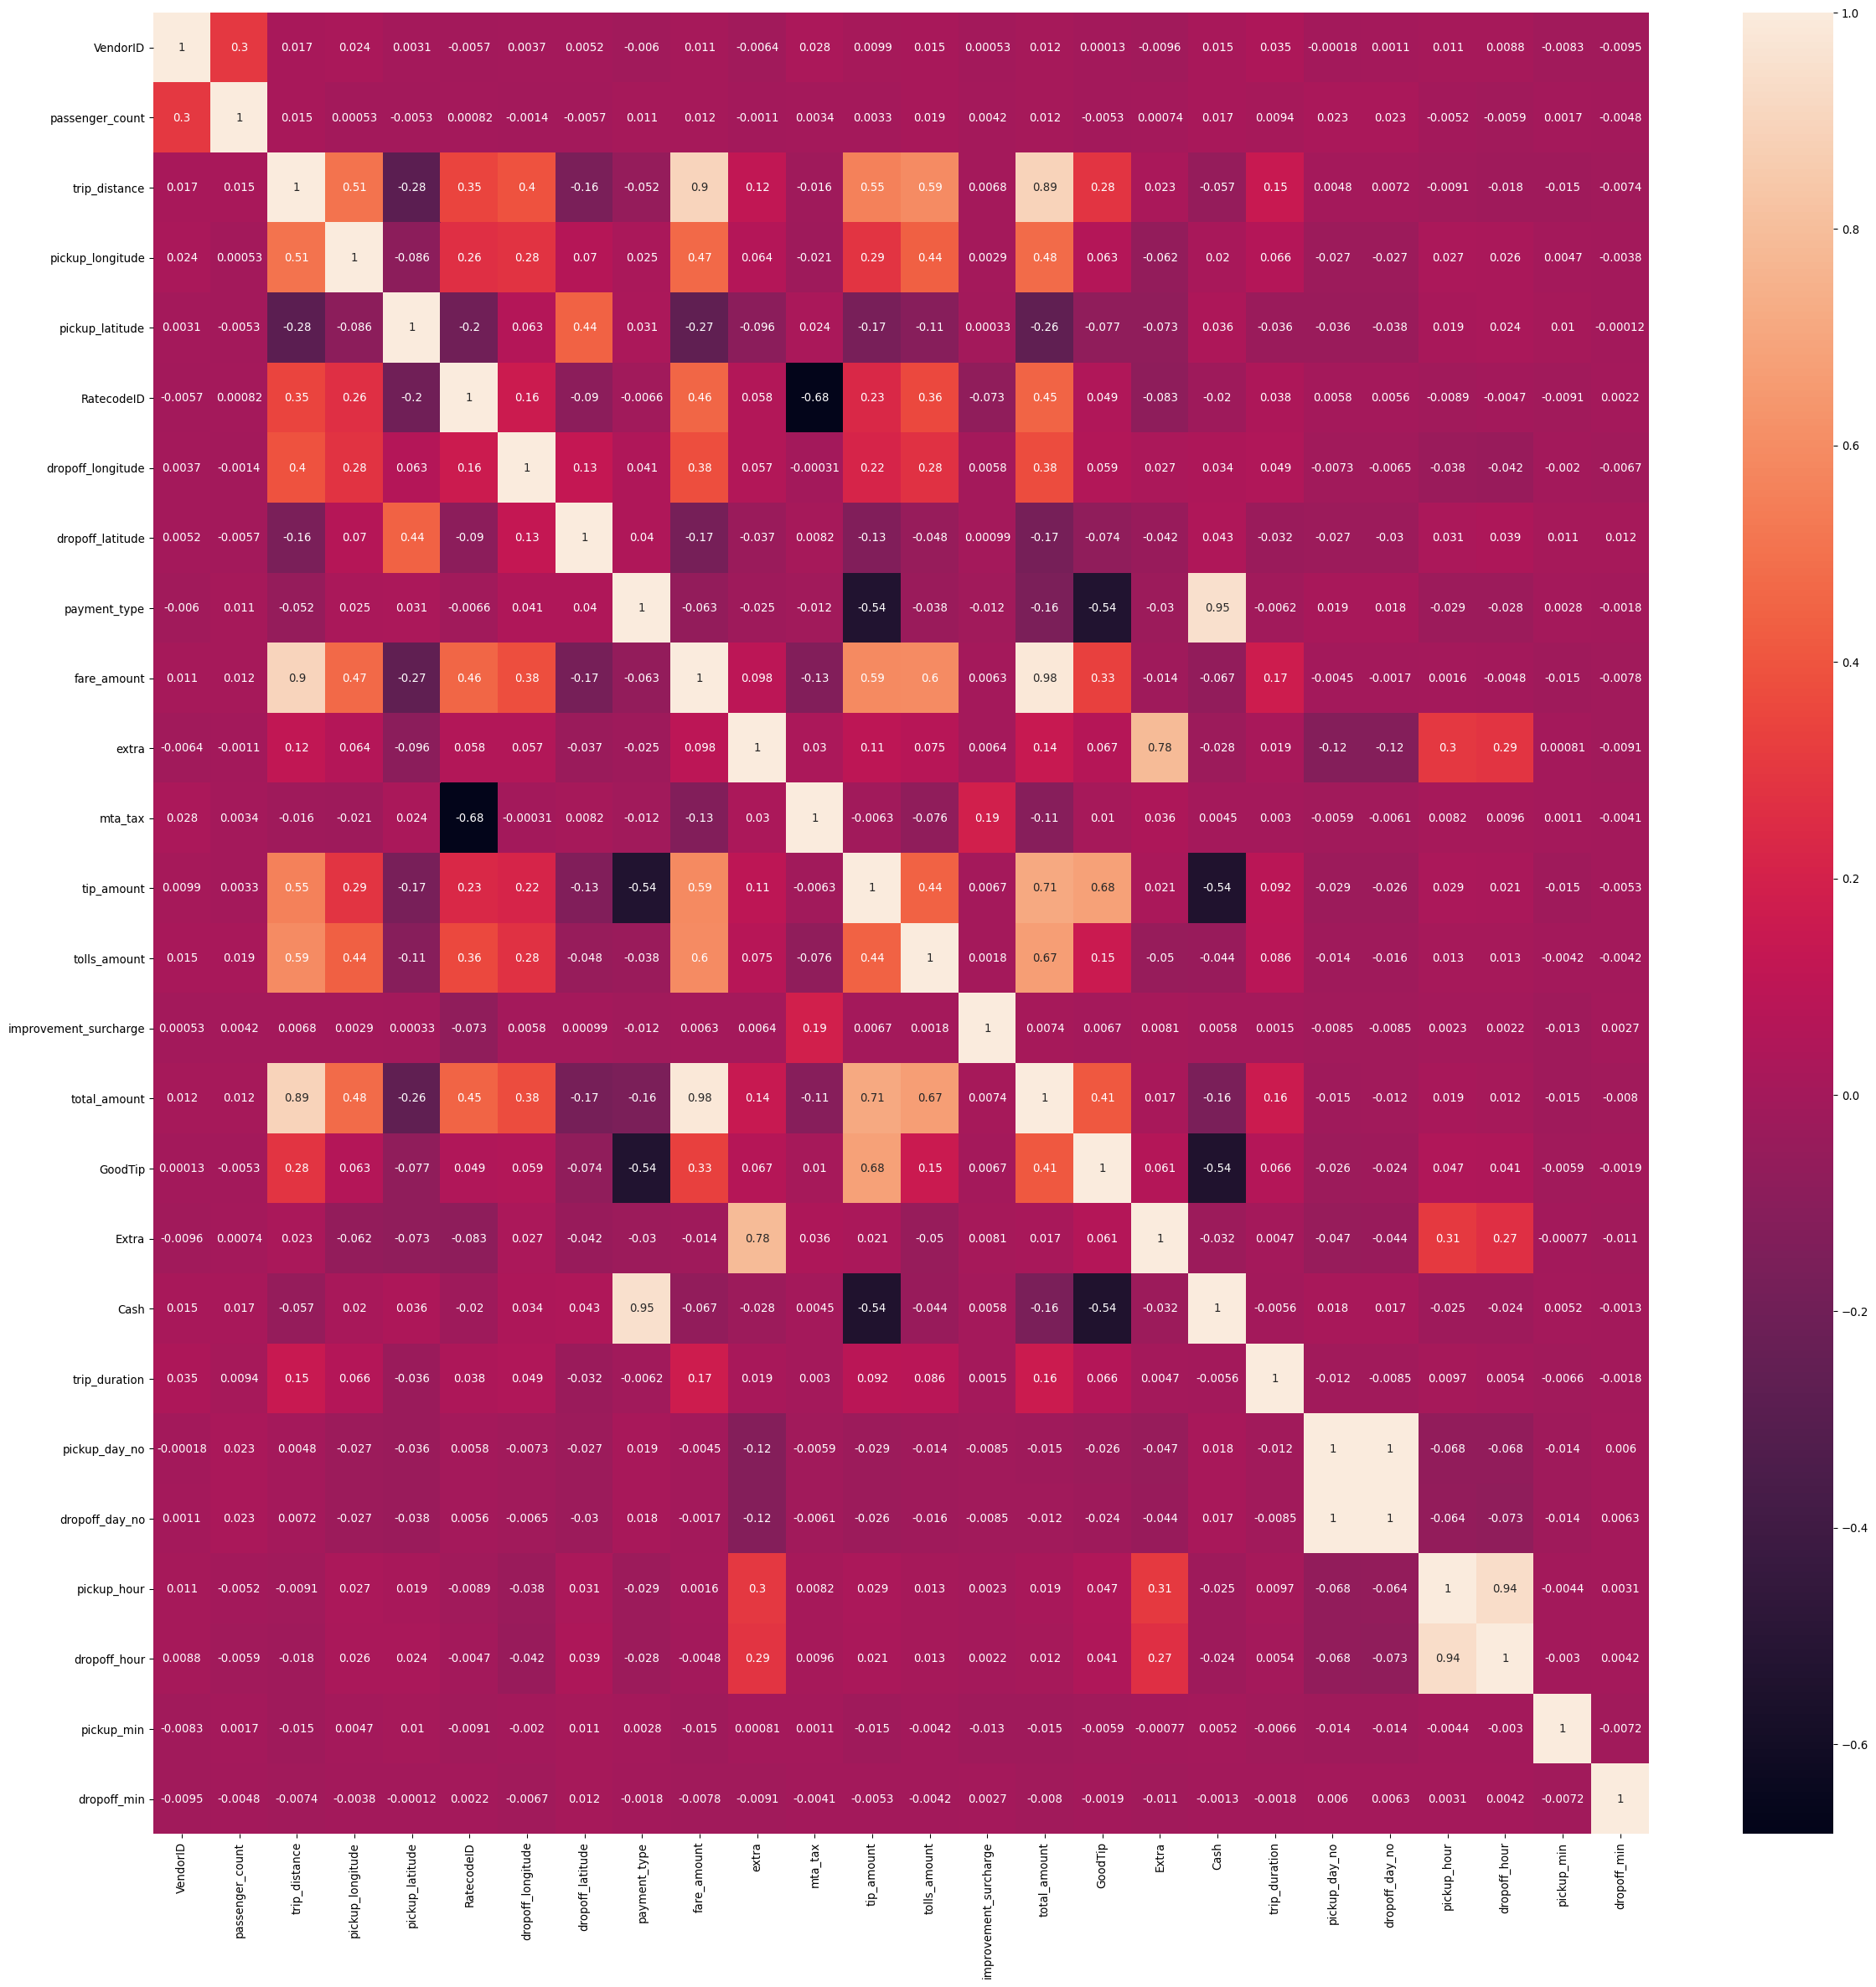

In [219]:
plt.figure(figsize = (30, 30), dpi = 96)
sns.heatmap(df.corr(), annot=True)
plt.show()

<AxesSubplot:>

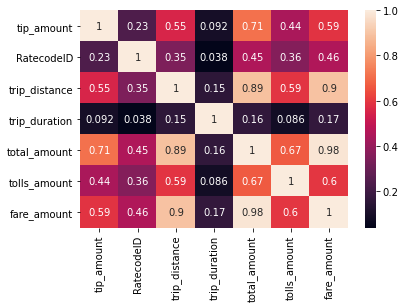

In [220]:
df1 = pd.DataFrame(df, columns= ['tip_amount','RatecodeID','trip_distance','trip_duration','total_amount','tolls_amount','fare_amount'])
sns.heatmap(df1.corr(),annot = True)
#df.columns

In [222]:
data = df.loc[:,['trip_distance','fare_amount','total_amount','tip_amount']]

In [162]:
data.head()

,trip_distance,fare_amount,total_amount,tip_amount
0,0.70,5.0,6.95,1.15
1,8.80,33.5,47.34,7.00
2,19.26,53.5,54.80,0.00
3,0.70,7.5,8.80,0.00
4,0.46,5.0,7.30,1.00


## Model Building

In [223]:
df1= df[['tip_amount','trip_distance','fare_amount','total_amount']]
df2 = df1.dropna()
x=df2.drop('tip_amount', axis =1)
y=df2[['tip_amount']]
x1tip=sm.add_constant(x)
results = sm.OLS(y, x1tip).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                 5.556e+04
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:38:20   Log-Likelihood:                -34409.
No. Observations:               27858   AIC:                         6.883e+04
Df Residuals:                   27854   BIC:                         6.886e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3668      0.009    -40.130

In [231]:
model = LinearRegression()
cross_val_score(model,x,y,cv=5).mean()   

0.8562551504282412

In [232]:
model = RandomForestRegressor()
cross_val_score(model,x,y,cv=5).mean()

0.9222025363635554

In [228]:
model = GradientBoostingRegressor(random_state =0)
cross_val_score(model,x,y,cv=5).mean()

0.8682320451447934

In [229]:
model = DecisionTreeRegressor(random_state=0)
cross_val_score(model,x,y,cv=5).mean()

0.8862414823971128

In [268]:

X_train, X_val, Y_train, Y_val = train_test_split(x, y, test_size=0.2, random_state=22)
X_train.shape, X_val.shape

((22286, 3), (5572, 3))

In [270]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [283]:
models = LinearRegression()
models.fit(X_train, Y_train)


pred_train = models.predict(X_train)
print('Training Accuracy : ', mae(Y_train, pred_train))

pred_val = models.predict(X_val)
print('Validation Accuracy : ', mae(Y_val, pred_val))
print()

Training Accuracy :  0.5003334079759919
Validation Accuracy :  0.5051413827269038



In [284]:
models = RandomForestRegressor()
models.fit(X_train, Y_train)


pred_train = models.predict(X_train)
print('Training Accuracy : ', mae(Y_train, pred_train))

pred_val = models.predict(X_val)
print('Validation Accuracy : ', mae(Y_val, pred_val))
print()

Training Accuracy :  0.08276639591572924
Validation Accuracy :  0.18346578521549908



In [285]:
models = GradientBoostingRegressor()
models.fit(X_train, Y_train)


pred_train = models.predict(X_train)
print('Training Accuracy : ', mae(Y_train, pred_train))

pred_val = models.predict(X_val)
print('Validation Accuracy : ', mae(Y_val, pred_val))
print()

Training Accuracy :  0.472652112330676
Validation Accuracy :  0.502861919515772



In [286]:
models = DecisionTreeRegressor()
models.fit(X_train, Y_train)


pred_train = models.predict(X_train)
print('Training Accuracy : ', mae(Y_train, pred_train))

pred_val = models.predict(X_val)
print('Validation Accuracy : ', mae(Y_val, pred_val))
print()

Training Accuracy :  0.027248194751100022
Validation Accuracy :  0.17149503758899462

